# DSR - Practical 4 - Backprop on a single artificial Neuron



In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self, x):
              # calulate the predictions
         ### ENTER YOUR CODE HERE
        preds = np.dot(x, self.W)
        preds = self.sigmoid_activation(preds)
        # return the predictions
        return preds
            
    def fit(self, X, y, epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        losses=[]
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            
            preds = self.predict(X)
            # now that we have our predictions, we need to determine the
            # `error`, which is the difference between our predictions and
            # the true values
            error = preds - y
            loss = (1/len(preds))*np.sum(error ** 2)
            losses.append(loss)
            # the gradient descent update is the dot product between our
            # (1) features and (2) the error of the sigmoid derivative of
            # our predictions
            d = error * self.sigmoid_deriv(preds)
            gradient = np.dot(X.T, d)#X.T.dot(d)
            # in the update stage, all we need to do is "nudge" the weight
            # matrix in the negative direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a set
            # of "more optimal" parameters
            self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
        return losses

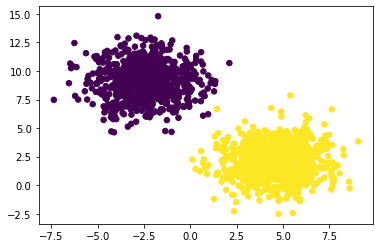

In [3]:
# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1600, n_features=2, centers=2,
cluster_std=1.5, random_state=42)
y = y.reshape((y.shape[0], 1))
plt.scatter(X[:, 0], X[:, 1], marker="o", c=y[:, 0], s=30)

# insert a column of 1's as the last entry in the feature
# matrix -- so we can train the bias as part of the weights
X = np.c_[X, np.ones((X.shape[0]))]
          
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)

In [12]:
len(testY)

800

In [13]:
### Modify Perceptron Class such that you save the training losses and return them 

In [4]:
epochs = 100
alpha = 0.001
# create Perceptron object and train
p = Perceptron(3, alpha=alpha)
losses = p.fit(trainX, trainY, epochs=epochs)

training...
epoch=  1 , loss=  0.32259373322939844
epoch=  2 , loss=  0.18261573026246822
epoch=  3 , loss=  0.06689273381938843
epoch=  4 , loss=  0.03378540923373805
epoch=  5 , loss=  0.02196963231646377
epoch=  6 , loss=  0.01613785536894236
epoch=  7 , loss=  0.012940510812754992
epoch=  8 , loss=  0.01102928363284742
epoch=  9 , loss=  0.009792847765411066
epoch=  10 , loss=  0.008941441692700475
epoch=  11 , loss=  0.008327075275022014
epoch=  12 , loss=  0.00786786770246491
epoch=  13 , loss=  0.00751517224418617
epoch=  14 , loss=  0.007238325951216638
epoch=  15 , loss=  0.00701705470966318
epoch=  16 , loss=  0.006837430109032572
epoch=  17 , loss=  0.006689585088559589
epoch=  18 , loss=  0.0065663544484425
epoch=  19 , loss=  0.0064624287676988195
epoch=  20 , loss=  0.006373807378035237
epoch=  21 , loss=  0.006297433075993858
epoch=  22 , loss=  0.00623094143825064
epoch=  23 , loss=  0.00617248475752833
epoch=  24 , loss=  0.006120605927146571
epoch=  25 , loss=  0.0060

In [5]:
# evaluate our model
print("evaluating...")
preds = p.predict(testX)
# apply a step function to threshold the outputs to binary
# class labe|ls
preds[preds <= 0.5] = 0
preds[preds > 0.5] = 1
print(classification_report(testY, preds))

evaluating...
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       403
           1       1.00      0.98      0.99       397

    accuracy                           0.99       800
   macro avg       0.99      0.99      0.99       800
weighted avg       0.99      0.99      0.99       800



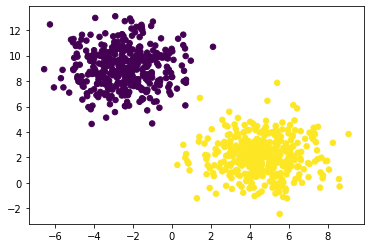

In [16]:
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY[:, 0], s=30)

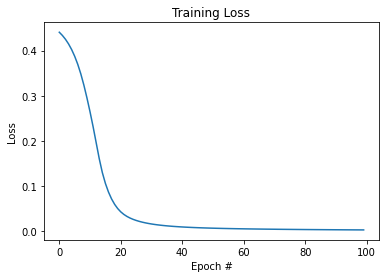

In [17]:
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

### Gradient Descent can be very slow and wasteful.
#### Especially if you are dealing with big data sets the computation becomes very coastly, yielding huge matrix calculations 
$$ W \cdot{X}   $$
#### the following is a more efficient way to perform GD with faster convergence.

## Stochastic Gradient descent
### instead of updating the weights on an entire epoch we do more updates on mini-batches of data.
### This way we have multiple updates per epoch.

#### implement sgd in our perceptron class (batches of 16)

In [18]:
## enter modified Perceptron Class here
class Perceptron:
    def __init__(self, N,alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N, 1)
        self.alpha = alpha
        

    def sigmoid_activation(self, x):
        # compute the sigmoid activation value for a given input
        ### ENTER YOUR CODE HERE
        return 1 /(1 + np.exp(-x))

    def sigmoid_deriv(self, x):
        # compute the derivative of the sigmoid function ASSUMING
        # that the input `x` has already been passed through the sigmoid
        # activation function
         ### ENTER YOUR CODE HERE
        return x*(1-x)
    
    def predict(self,x):
              # take the dot product between our features and weight matrix
         ### ENTER YOUR CODE HERE
        preds = np.dot(x,self.W)
        preds = self.sigmoid_activation(preds) 
        
        # return the predictions
        return preds
            
    def fit(self, X, y,epochs):
        # initialize our weight matrix and list of losses
        print("training...")
        
        losses = []
        # loop over the desired number of epochs
        for e in np.arange(0, epochs):
            x_batched = np.split(X,len(X)/16)
            y_batched = np.split(y,len(y)/16)
            for ind, xb in enumerate(x_batched): 
                preds = self.predict(xb)
                # now that we have our predictions, we need to determine the
                # `error`, which is the difference between our predictions and
                # the true values
                error = preds - y_batched[ind]
                loss = (1/ 16) * np.sum(error ** 2)
                losses.append(loss)
                # the gradient descent update is the dot product between our
                # (1) features and (2) the error of the sigmoid derivative of
                # our predictions
                d = error * self.sigmoid_deriv(preds)
                gradient = np.dot(xb.T,d)#X.T.dot(d)
                # in the update stage, all we need to do is "nudge" the weight
                # matrix in the negative direction of the gradient (hence the
                # term "gradient descent" by taking a small step towards a set
                # of "more optimal" parameters
                self.W += -self.alpha * gradient
            # check to see if an update should be displayed
            if e == 0 or (e + 1) % 1 == 0:
                print("epoch= ",int(e+1),", loss= ",loss)
            # shuffling the data the before next epoch
            # so the perceptron sees different batches
            idx = np.random.permutation(len(X))  
            X = X[idx]
            y = y[idx]
        return losses

In [19]:
# create a perceptron object and train it save the losses as losses2 and compare the 
# losses of the current and former percptrons
epochs = 100
alpha = 0.01
p = Perceptron(3, alpha=alpha)
losses2 = p.fit(trainX, trainY, epochs=epochs)

training...
epoch=  1 , loss=  0.6297996557092703
epoch=  2 , loss=  0.6860362940830086
epoch=  3 , loss=  0.429013872670841
epoch=  4 , loss=  0.48565844310216383
epoch=  5 , loss=  0.19471016228870577
epoch=  6 , loss=  0.08745157240102051
epoch=  7 , loss=  0.06327419371261504
epoch=  8 , loss=  0.014133566819445359
epoch=  9 , loss=  1.8821024688472703e-07
epoch=  10 , loss=  4.673229444878695e-07
epoch=  11 , loss=  0.00913681518108017
epoch=  12 , loss=  0.039607760218779445
epoch=  13 , loss=  2.7711778234999795e-05
epoch=  14 , loss=  4.018318582407774e-09
epoch=  15 , loss=  2.7073933761458805e-06
epoch=  16 , loss=  0.010379130623728285
epoch=  17 , loss=  5.370350780072333e-08
epoch=  18 , loss=  0.012544709179663218
epoch=  19 , loss=  3.917900067168883e-07
epoch=  20 , loss=  6.440146249517747e-10
epoch=  21 , loss=  0.00010640520131689236
epoch=  22 , loss=  9.507123946498538e-05
epoch=  23 , loss=  3.765982900814064e-05
epoch=  24 , loss=  3.0740912458635905e-05
epoch=  

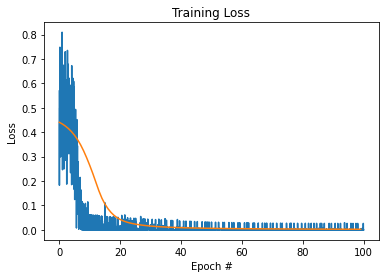

In [20]:
#plot the losses of both perceptrons
plt.plot(np.arange(0, len(losses2))/50, losses2)
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()

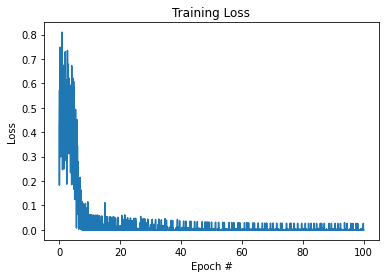

In [21]:

plt.plot(np.arange(0, len(losses2))/50, losses2)

plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()